In [ ]:
# envelope_detector.ipynb

## A digital envelope detector built to mimic the response of an analog diode-capacitor/resistor detector.
## Applications: AM radio
# Eric Graves
# edg732
# Created 03/09/2020

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.io
import scipy.signal

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

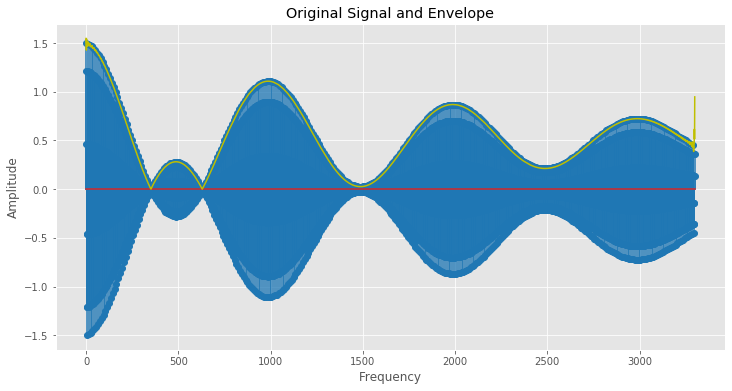

In [34]:
# # Load data for test: sampled impulse response
# data = scipy.io.loadmat('hw5p1mat.mat') # contains 2 arrays we care about: 'x':3 and 'd':4

# # Extract the arrays, and transpose into useable arrays (otherwise len(d) == 1)
# x = data.get('x').T # Input signal
# d = data.get('d').T # Output signal (desired)

time = 0.33
Ts = 1/10000                                  # sampling interval
t = np.arange(0, 0.33, Ts)

fc = 1000                                     # high frequency component
c = np.cos(2*np.pi*fc*t)

fm = 10                                       # low frequency component
w = np.cos(2*np.pi*fm*t)*np.exp(-5*t) + 0.5   # Static nonlinearity emulates Diode response

# Modulate the two signals
x = c * w

# Use Hilbert Transform to extract the envelope
x_env = np.abs(scipy.signal.hilbert(x))

# Plot
with plt.style.context('ggplot'): # Set style to be like R
    
    plt.figure(figsize=(12,6))
    plt.title('Original Signal and Envelope')
    
    plt.stem(x)                  # Original sampled signal
    
    plt.plot(x_env, color='y')   # Extracted envelope

    plt.ylabel('Amplitude') 
    plt.xlabel('Frequency') 
    

    
    # Style stuff below
    font = {'family': 'sans',
           'color':  'black',
           'weight': 'normal',
           'size': 16,
           }
    